In [72]:
print ("Исполнитель: Зайцева Алина Алексеевна 20БИ2")
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Исполнитель: Зайцева Алина Алексеевна 20БИ2
Tue Mar  2 18:42:41 MSK 2021


In [73]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/SWOT
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash']
['Копия SWOT_K-pop_cafe.gsheet', 'SWOT_K-pop_cafe.gsheet', 'SWOT.ipynb']
total 75
-rw------- 1 root 75735 Mar  2 17:58  SWOT.ipynb
-rw------- 1 root   151 Mar  2 17:58  SWOT_K-pop_cafe.gsheet
-rw------- 1 root   151 Mar  1 16:57 'Копия SWOT_K-pop_cafe.gsheet'


total 75
-rw------- 1 root 75735 Mar  2 17:58  SWOT.ipynb
-rw------- 1 root   151 Mar  2 17:58  SWOT_K-pop_cafe.gsheet
-rw------- 1 root   151 Mar  1 16:57 'Копия SWOT_K-pop_cafe.gsheet'
1 ['Оригинальное меню', 'Создать уникальные блюда, которые нельзя попробовать в других кафе', '10', '0.8', '8', '31.8']
2 ['Популярность темы кафе', 'Выбрать темой кафе k-pop, так как корейская музыка сейчас очень популярна среди молодежи', '8', '1', '8', '']
3 ['Отсутствие конкурентов', 'В Нижнем Новгороде отсутствуют подобные заведения', '9', '0.9', '8.1', '']
4 ['Работники кафе', 'Нанять на работу персонал, который будет заинтерисован в теме кафе, и обеспечить его постоянную мотивацию', '7', '0.6', '4.2', '']
5 ['Низкий средний чек', 'Установить цены, приемлемые для молодежи', '7', '0.5', '3.5', '']


['Оригинальное меню', 'Популярность темы кафе', 'Отсутствие конкурентов', 'Работники кафе', 'Низкий средний чек']
['Создать уникальные блюда, которые нельзя попробовать в других кафе', 'Выбрать темой к

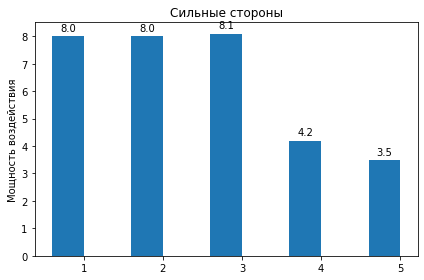

1 - Оригинальное меню
2 - Популярность темы кафе
3 - Отсутствие конкурентов
4 - Работники кафе
5 - Низкий средний чек


In [74]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT/SWOT_K-pop_cafe.gsheet')
table = gs.open_by_key('1U0-PC9CLCQpL07Vl3eoPKF1h1lQKNPuVH05U7MjKuPI')
worksheet = table.worksheet('Strengths')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
strengths_sum = sum(power)
print('Суммарная сила сильный сторон:', strengths_sum)
worksheet.update('F1', 'Суммарная сила сильный сторон')
worksheet.update('F2', strengths_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Сильные стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

total 75
-rw------- 1 root 75735 Mar  2 17:58  SWOT.ipynb
-rw------- 1 root   151 Mar  2 17:58  SWOT_K-pop_cafe.gsheet
-rw------- 1 root   151 Mar  1 16:57 'Копия SWOT_K-pop_cafe.gsheet'
1 ['Недостаток средств для открытия кафе', 'Взять кредит или привлечь инвесторов', '9', '0.9', '8', '18.3']
2 ['Еще не сформировавшийся имидж', 'Поводить усиленную рекламную компанию для привлечения посетителей', '7', '0.9', '8', '']
3 ['Отсутствия опыта в бизнесе', 'Изучить материалы о бизнесе или привлечь специалиста', '7', '0.5', '8.1', '']
4 ['Тема кафе интересна не всем', 'Нейтрализуется популярностью темы кафе среди определенной аудитории', '2', '0.2', '4.2', '']


['Недостаток средств для открытия кафе', 'Еще не сформировавшийся имидж', 'Отсутствия опыта в бизнесе', 'Тема кафе интересна не всем']
['Взять кредит или привлечь инвесторов', 'Поводить усиленную рекламную компанию для привлечения посетителей', 'Изучить материалы о бизнесе или привлечь специалиста', 'Нейтрализуется популярностью темы к

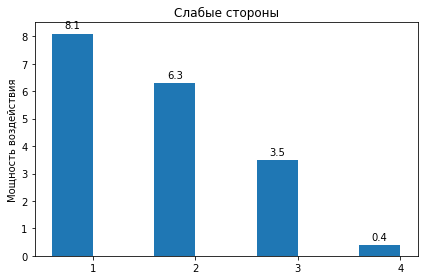

1 - Недостаток средств для открытия кафе
2 - Еще не сформировавшийся имидж
3 - Отсутствия опыта в бизнесе
4 - Тема кафе интересна не всем


In [75]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT/SWOT_K-pop_cafe.gsheet')
table = gs.open_by_key('1U0-PC9CLCQpL07Vl3eoPKF1h1lQKNPuVH05U7MjKuPI')
worksheet = table.worksheet('Weaknesses')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
weaknesses_sum = sum(power)
print('Суммарная сила слабых сторон:', weaknesses_sum)
worksheet.update('F1', 'Суммарная сила слабых сторон') #добавление в таблицу
worksheet.update('F2', weaknesses_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Слабые стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

total 75
-rw------- 1 root 75735 Mar  2 17:58  SWOT.ipynb
-rw------- 1 root   151 Mar  2 18:42  SWOT_K-pop_cafe.gsheet
-rw------- 1 root   151 Mar  1 16:57 'Копия SWOT_K-pop_cafe.gsheet'
1 ['Проведение эффективной рекламы', 'Рекламировать кафе в социальных сетях, так как целевая аудитория проводит большего всего времени там', '8', '0.8', '8', '23.2']
2 ['Привлечение большего количества посетителей', 'Расширить меню и список услуг кафе', '9', '0.7', '8', '']
3 ['Завоевание популярности кафе в городе', 'За счет популярности темы кафе и отсутсвия подобных заведений в Нижнем Новгороде', '9', '0.9', '8.1', '']
4 ['Расширение сети кафе', 'Открыть кафе в других частях города и в других городах', '6', '0.4', '4.2', '']


['Проведение эффективной рекламы', 'Привлечение большего количества посетителей', 'Завоевание популярности кафе в городе', 'Расширение сети кафе']
['Рекламировать кафе в социальных сетях, так как целевая аудитория проводит большего всего времени там', 'Расширить меню и список 

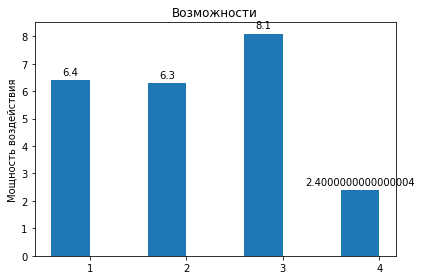

1 - Проведение эффективной рекламы
2 - Привлечение большего количества посетителей
3 - Завоевание популярности кафе в городе
4 - Расширение сети кафе


In [76]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT/SWOT_K-pop_cafe.gsheet')
table = gs.open_by_key('1U0-PC9CLCQpL07Vl3eoPKF1h1lQKNPuVH05U7MjKuPI')
worksheet = table.worksheet('Opportunities')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
opportunities_sum = sum(power)
print('Суммарная сила возможностей:', opportunities_sum)
worksheet.update('F1', 'Суммарная сила возможностей') #добавление в таблицу
worksheet.update('F2', opportunities_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Возможности')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

total 75
-rw------- 1 root 75735 Mar  2 17:58  SWOT.ipynb
-rw------- 1 root   151 Mar  2 18:42  SWOT_K-pop_cafe.gsheet
-rw------- 1 root   151 Mar  1 16:57 'Копия SWOT_K-pop_cafe.gsheet'
1 ['Измнение вкусов клиентов (тема кафе может стать немодной)', 'Создание условий для смены темы кафе, при минимальных затратах', '8', '0.5', '8', '19.1']
2 ['Появление конкурентов', 'Постоянное обновление меню и списка услуг кафе, чтобы иметь конкурентное преимущество', '8', '0.9', '8', '']
3 ['Рыночная власть потребителей', 'Услуга уникальна', '7', '0.1', '8.1', '']
4 ['Экономическая нестабильность в стране', 'Создание возможности для снижения цен в кафе', '8', '0.9', '4.2', '']


['Измнение вкусов клиентов (тема кафе может стать немодной)', 'Появление конкурентов', 'Рыночная власть потребителей', 'Экономическая нестабильность в стране']
['Создание условий для смены темы кафе, при минимальных затратах', 'Постоянное обновление меню и списка услуг кафе, чтобы иметь конкурентное преимущество', 'Услуга у

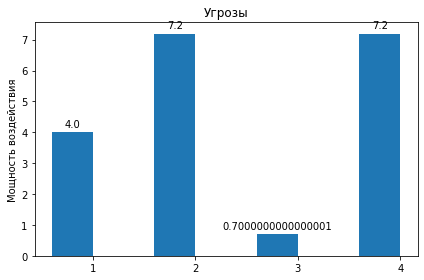

1 - Измнение вкусов клиентов (тема кафе может стать немодной)
2 - Появление конкурентов
3 - Рыночная власть потребителей
4 - Экономическая нестабильность в стране


In [77]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT/SWOT_K-pop_cafe.gsheet')
table = gs.open_by_key('1U0-PC9CLCQpL07Vl3eoPKF1h1lQKNPuVH05U7MjKuPI')
worksheet = table.worksheet('Threats')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
threats_sum = sum(power)
print('Суммарная сила угроз:', threats_sum)
worksheet.update('F1', 'Суммарная сила угроз') #добавление в таблицу
worksheet.update('F2', threats_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Угрозы')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Результат: 17.6


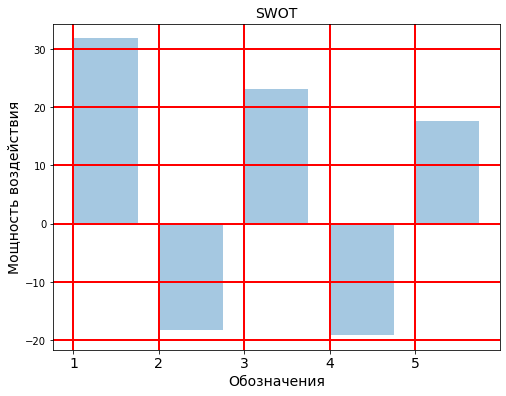

1  -  Сильные стороны
2  -  Слабые стороны
3  -  Возможности
4  -  Угорозы
5  -  Результат


In [78]:
#копирование значений силы из листов
worksheet = table.worksheet('Strengths')
strengths_power = worksheet.acell('F2').value
worksheet = table.worksheet('Weaknesses')
weaknesses_power = worksheet.acell('F2').value
worksheet = table.worksheet('Opportunities')
opportunities_power = worksheet.acell('F2').value
worksheet = table.worksheet('Threats')
threats_power = worksheet.acell('F2').value
#добавление в таблицу result
worksheet = table.worksheet('Result')
worksheet.update('A1', 'Суммарная сила сильных сторон')
worksheet.update('A2', strengths_power)
worksheet.update('B1', 'Суммарная сила слабых сторон') 
worksheet.update('B2', weaknesses_power)
worksheet.update('A4', 'Суммарная сила возможностей') 
worksheet.update('A5', opportunities_power)
worksheet.update('B4', 'Суммарная сила угроз') 
worksheet.update('B5', threats_power)
#подсчет результата анализа и добавление его в таблицу
result = float(strengths_power) - 1*float(weaknesses_power) + float(opportunities_power) - 1*float(threats_power)
print('Результат:', result)
worksheet = table.worksheet('Result')
worksheet.update('A7', 'Результат')
worksheet.update('A8', result)
#создание графика
def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
x_float = [1, 2, 3, 4, 5]
y_float = [float(strengths_power), -1*float(weaknesses_power), float(opportunities_power), -1*float(threats_power),  result]
title = [ "Сильные стороны", "Слабые стороны", "Возможности", "Угорозы", "Результат"]
x_pos=list()
i=0
for i in range(x_float.__len__()):
  x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()
#печать заголовков
for i in range(title.__len__()):
  print(i+1, " - ", title[i])
  i += 1